In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('StudentsPerformance.csv.txt')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
feature_with_null=[feature for feature in data.columns if data[feature].isnull().sum()==0]
feature_with_null

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
#data.value_counts()

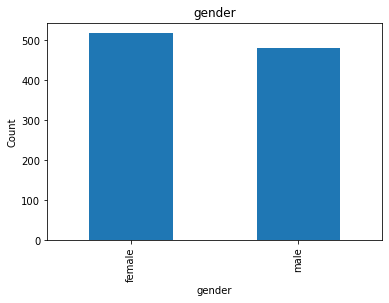

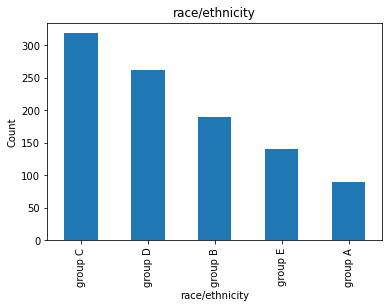

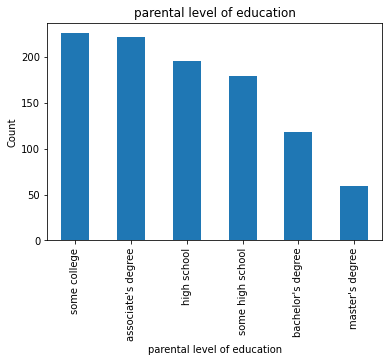

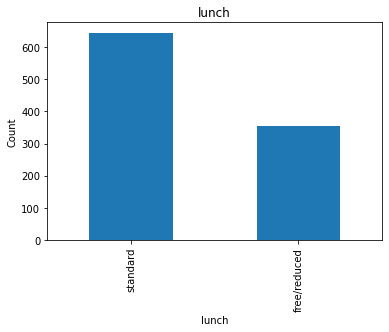

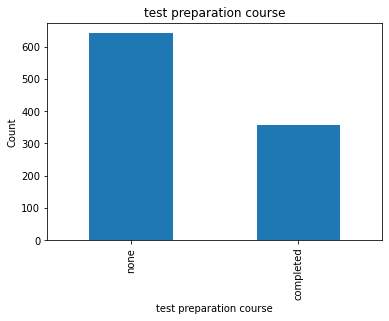

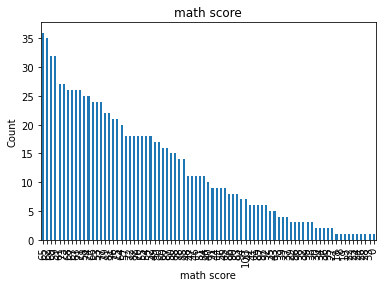

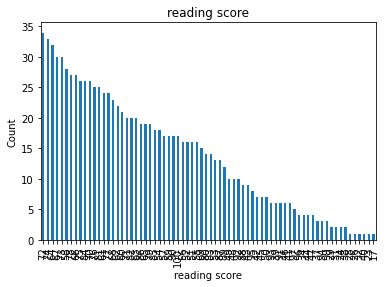

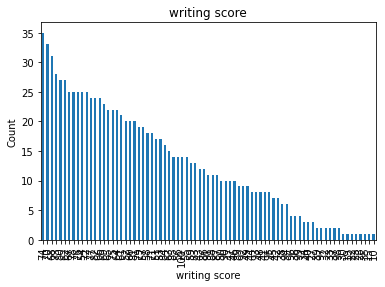

In [7]:
for feature in data:
    data[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
passmarks=50
data['pass_math']=np.where(data['math score']<passmarks,'fail','pass')
data['pass_math'].value_counts()

pass    865
fail    135
Name: pass_math, dtype: int64

Text(0, 0.5, 'count')

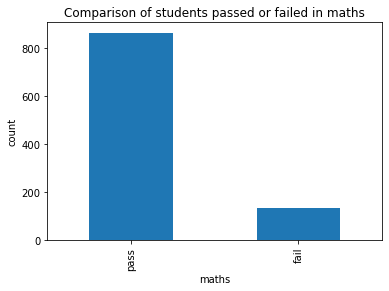

In [10]:
data['pass_math'].value_counts().plot.bar()
plt.title('Comparison of students passed or failed in maths')
plt.xlabel('maths')
plt.ylabel('count')

pass    910
fail     90
Name: pass_reading, dtype: int64


Text(0, 0.5, 'count')

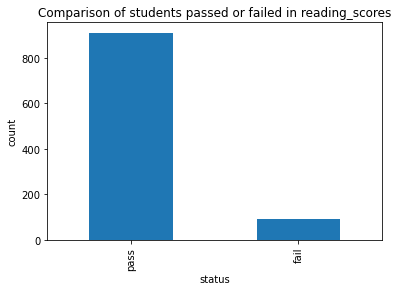

In [11]:

data['pass_reading']=np.where(data['reading score']<passmarks,'fail','pass')
print(data['pass_reading'].value_counts())
data['pass_reading'].value_counts().plot.bar()
plt.title('Comparison of students passed or failed in reading_scores')
plt.xlabel('status')
plt.ylabel('count')

pass    886
fail    114
Name: pass_writing, dtype: int64


Text(0, 0.5, 'count')

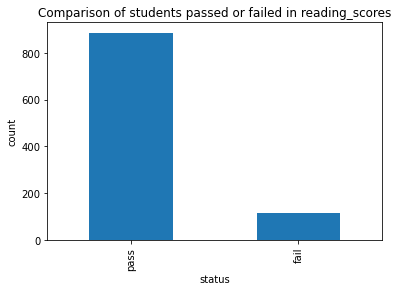

In [12]:
data['pass_writing']=np.where(data['writing score']<passmarks,'fail','pass')
print(data['pass_writing'].value_counts())
data['pass_writing'].value_counts().plot.bar()
plt.title('Comparison of students passed or failed in reading_scores')
plt.xlabel('status')
plt.ylabel('count')

In [13]:
data['total_scores']=data['math score']+data['reading score']+data['writing score']
data['total_scores']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_scores, Length: 1000, dtype: int64

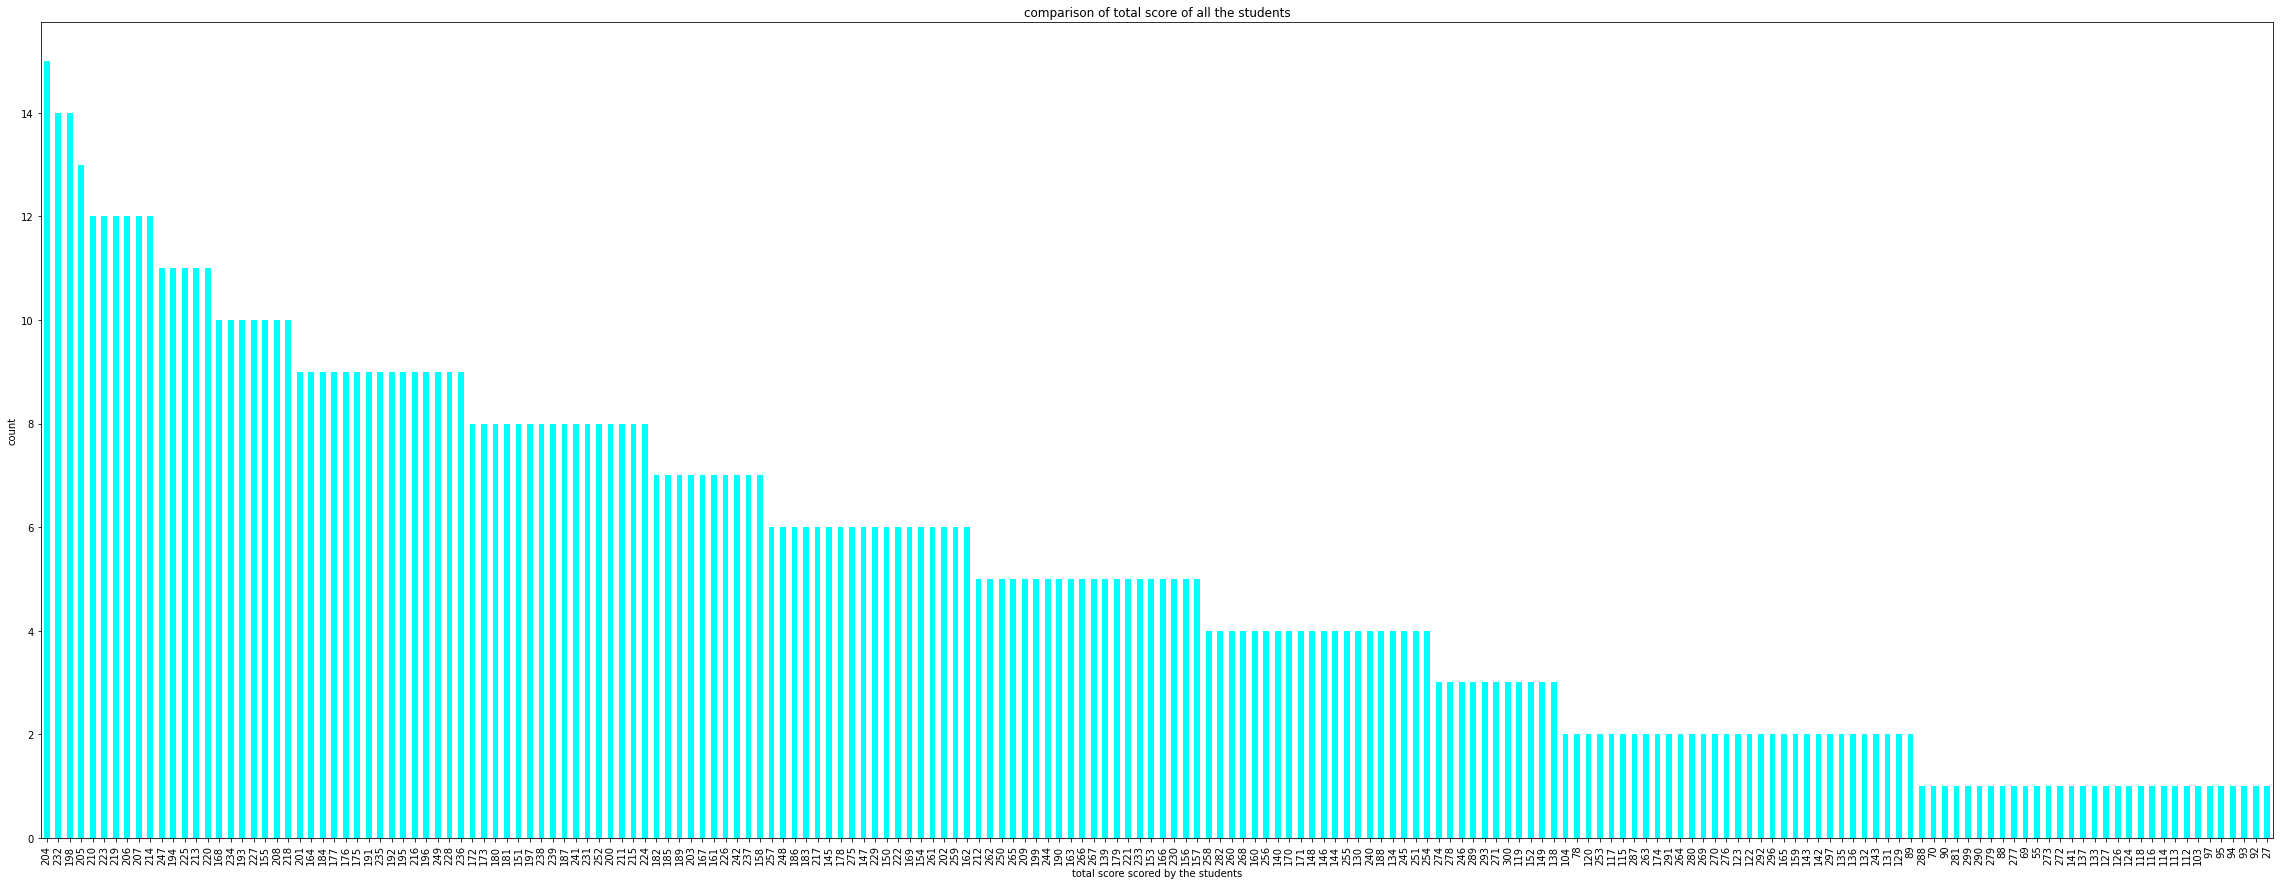

In [14]:
data['total_scores'].value_counts(normalize = True)
data['total_scores'].value_counts(dropna = True).plot.bar(color = 'cyan', figsize = (40, 15))

plt.title('comparison of total score of all the students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

<ipython-input-15-6e04c06ad526>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percentage'][i] = ceil(data['percentage'][i])


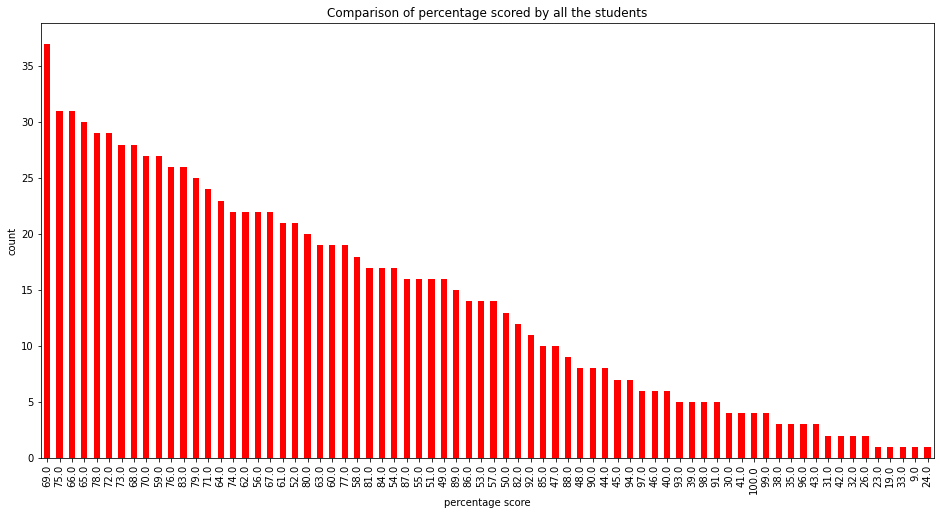

In [15]:
from math import * 

data['percentage'] = data['total_scores']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])
data['percentage'].value_counts(normalize = True)
data['percentage'].value_counts(dropna = False).plot.bar(figsize = (16, 8), color = 'red')
plt.title('Comparison of percentage scored by all the students')
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

pass    1000
Name: status, dtype: int64


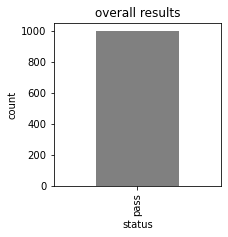

In [16]:
data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)
print(data['status'].value_counts())

data['status'].value_counts(dropna = False).plot.bar(color = 'gray', figsize = (3, 3))
plt.title('overall results')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [17]:
def getgrade(percentage, status):
    if status == 'Fail':
        return 'E'
    if(percentage >= 90):
        return 'O'
    if(percentage >= 80):
        return 'A'
    if(percentage >= 70):
        return 'B'
    if(percentage >= 60):
        return 'C'
    if(percentage >= 40):
        return 'D'
    else : 
        return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()
   

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

In [18]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_scores,percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,pass,pass,pass,218,73.0,pass,B
1,female,group C,some college,standard,completed,69,90,88,pass,pass,pass,247,83.0,pass,A
2,female,group B,master's degree,standard,none,90,95,93,pass,pass,pass,278,93.0,pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,fail,pass,fail,148,50.0,pass,D
4,male,group C,some college,standard,none,76,78,75,pass,pass,pass,229,77.0,pass,B


In [19]:
data.describe()

,math score,reading score,writing score,total_scores,percentage
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,68.105000
std,15.16308,14.600192,15.195657,42.771978,14.258095
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,59.000000
50%,66.00000,70.000000,69.000000,205.000000,69.000000
75%,77.00000,79.000000,79.000000,233.000000,78.000000
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [20]:

from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['test preparation course'].value_counts()

1    642
0    358
Name: test preparation course, dtype: int64

In [21]:
data['lunch'] = le.fit_transform(data['lunch'])
data['lunch'].value_counts()

1    645
0    355
Name: lunch, dtype: int64

In [22]:
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [23]:
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['parental level of education'].value_counts()

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

In [24]:
data['gender'] = le.fit_transform(data['gender'])
data['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

In [25]:
data['pass_math'] = le.fit_transform(data['pass_math'])
data['pass_math'].value_counts()

1    865
0    135
Name: pass_math, dtype: int64

In [26]:
data['pass_reading'] = le.fit_transform(data['pass_reading'])
data['pass_reading'].value_counts()

1    910
0     90
Name: pass_reading, dtype: int64

In [27]:
data['pass_writing'] = le.fit_transform(data['pass_writing'])
data['pass_writing'].value_counts()

1    886
0    114
Name: pass_writing, dtype: int64

In [28]:
data['grades'] = data['grades'].replace('O', 0)
data['grades'] = data['grades'].replace('A', 1)
data['grades'] = data['grades'].replace('B', 2)
data['grades'] = data['grades'].replace('C', 3)
data['grades'] = data['grades'].replace('D', 4)
data['grades'] = data['grades'].replace('E', 5)

data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [46]:
x = data.iloc[:,:14]
x=data.drop(['status'],axis=1)
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [48]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_scores,percentage,status,grades
0,0,2,1,1,1,72,72,74,1,1,1,218,73.0,pass,2
1,0,3,4,1,0,69,90,88,1,1,1,247,83.0,pass,1
2,0,2,3,1,1,90,95,93,1,1,1,278,93.0,pass,0
3,1,1,0,0,1,47,57,44,0,1,0,148,50.0,pass,4
4,1,3,4,1,1,76,78,75,1,1,1,229,77.0,pass,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,1,1,1,282,94.0,pass,0
996,1,3,2,0,1,62,55,55,1,1,1,172,58.0,pass,4
997,0,3,2,0,0,59,71,65,1,1,1,195,65.0,pass,3
998,0,4,4,1,0,68,78,77,1,1,1,223,75.0,pass,2


In [53]:
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

In [55]:
x_train

array([[0.        , 0.25      , 0.2       , ..., 0.78754579, 0.79120879,
        0.2       ],
       [0.        , 0.        , 0.4       , ..., 0.35164835, 0.35164835,
        0.8       ],
       [1.        , 0.5       , 0.6       , ..., 0.70695971, 0.71428571,
        0.4       ],
       ...,
       [0.        , 1.        , 0.4       , ..., 0.75457875, 0.75824176,
        0.4       ],
       [0.        , 0.5       , 0.2       , ..., 0.64102564, 0.64835165,
        0.6       ],
       [1.        , 0.5       , 1.        , ..., 0.7032967 , 0.7032967 ,
        0.4       ]])

In [56]:
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8813333333333333
Testing Accuracy : 0.796


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[ 4  7  0  0  0  0]
 [ 1 19 12  0  0  0]
 [ 0  0 53 19  0  0]
 [ 0  0  0 57  1  0]
 [ 0  0  0  6 64  1]
 [ 0  0  0  0  4  2]]


In [58]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.512


In [59]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[ 9  2  0  0  0  0]
 [ 0 14 18  0  0  0]
 [ 0  0 27 45  0  0]
 [ 0  0  0 22 36  0]
 [ 0  0  0  0 50 21]
 [ 0  0  0  0  0  6]]


In [60]:
# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean accuracy : 1.0
mean standard variance : 0.0


In [61]:
from sklearn.tree import DecisionTreeClassifier

# creating a model
model = DecisionTreeClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.576


In [62]:
from sklearn.svm import SVC

# creating a model
model = SVC()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.996
Testing Accuracy : 0.956
